In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir("gdrive/Shared drives/CMPE 255")

In [3]:
!pip install tf-nightly-gpu-2.0-preview

ERROR: Could not find a version that satisfies the requirement tf-nightly-gpu-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf-nightly-gpu-2.0-preview


In [4]:
!pip install contractions

     |████████████████████████████████| 245kB 42.5MB/s 
     |████████████████████████████████| 317kB 58.7MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81702 sha256=1f49846ec745355715035d92bbb804b66a2443e0e0f08d10143cced1a7b94e24
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [0]:

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

Importing Libraries from Keras.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from scipy.spatial.distance import cdist

In [7]:
#Checking the version on Tensorflow
tf.__version__


'2.2.0-rc3'

In [8]:
#Checking the version of Keras
tf.keras.__version__


'2.3.0-tf'

In [9]:
import pandas
pandas.__version__

'1.0.3'

Load Data


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from scipy.spatial.distance import cdist

In [0]:
import sqlite3
import pandas as pd
connection = sqlite3.connect('./dataSet/yelpHotelData.db')
x1 = connection.execute("select * FROM review")

In [0]:
description = []
Class = []

data = x1.fetchmany(688329)

for x in data:
  description.append(x[3])
  Class.append(x[8])
trainData = {'Class' : Class, 'Description' : description}
df_X = pd.DataFrame(trainData)

#df_X = df_X.head(20000)

In [14]:
#Convert NR->N , YR->Y
df_X.loc[df_X['Class'] == "NR", 'Class'] = "N"
df_X.loc[df_X['Class'] == "YR", 'Class'] = "Y"
df_X['Class'].value_counts()

N    420785
Y    267544
Name: Class, dtype: int64

In [0]:
df_X['Class'] = df_X['Class'].apply(lambda x:1 if x=='Y' else 0)

In [17]:
df_X['Class']

0         0
1         0
2         0
3         0
4         0
         ..
688324    1
688325    1
688326    1
688327    1
688328    1
Name: Class, Length: 688329, dtype: int64

In [0]:
texts = df_X['Description'].values
labels = df_X['Class'].values

In [0]:
MAX_NUM_WORDS=1000
MAX_SEQUENCE_LENGTH=100

In [0]:

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [0]:
from sklearn.model_selection import train_test_split
import pickle

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_X['Description'],df_X['Class'], test_size=0.3, random_state=42)

In [23]:
#Checking the shape of Train and Test Data
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(481830,) (206499,)
(481830,) (206499,)


In [24]:
#Checking the length of train and test data
print("Train-set size: ", len(X_train))
print("Test-set size:  ", len(X_test))

Train-set size:  481830
Test-set size:   206499


In [0]:
#Combine into one data-set for some uses below.
data_text = X_train + X_test

In [26]:
#Printing an example to see how data looks like
X_train[1]

'The only place inside the Loop that you can stay for $55/night. Also, the only place you can have a picnic dinner and get a little frisky on the 17th floor roof and then wake up in your room the next morning to an army of ants going in on your picnic leftovers.'

In [27]:
y_train[1]

0

Tokenizer
A neural network cannot work directly on text-strings so we must convert it somehow. There are two steps in this conversion, the first step is called the "tokenizer" which converts words to integers and is done on the data-set before it is input to the neural network. The second step is an integrated part of the neural network itself and is called the "embedding"-layer, which is described further below.

We may instruct the tokenizer to only use e.g. the 10000 most popular words from the data-set.


In [0]:
num_words = 10000
tokenizer = Tokenizer(num_words=num_words)


The tokenizer can then be "fitted" to the data-set. This scans through all the text and strips it from unwanted characters such as punctuation, and also converts it to lower-case characters. The tokenizer then builds a vocabulary of all unique words along with various data-structures for accessing the data.



In [29]:
#Tokenization of train data
%%time
X_train_token = tokenizer.fit_on_texts(X_train)

CPU times: user 54.3 s, sys: 57.5 ms, total: 54.3 s
Wall time: 54.3 s


In [0]:
# df_X=X_train_token
# df_X.head()

In [0]:
# pickle_out = open("gdata/train_token.pickle","wb")
# pickle.dump(X_train_token, pickle_out)
# pickle_out.close()

In [30]:
#Tokenization of test data
%%time
X_test_token = tokenizer.fit_on_texts(X_test)
# pickle_out_test = open("test_token.pickle","wb")
# pickle.dump(X_test_token, pickle_out_test)
# pickle_out_test.close()

CPU times: user 23.9 s, sys: 38.8 ms, total: 23.9 s
Wall time: 23.9 s


In [0]:
#set num_words=None above, and then it will automatically be set to the vocabulary-size here.


if num_words is None:
    num_words = len(tokenizer.word_index)

We can then inspect the vocabulary that has been gathered by the tokenizer. This is ordered by the number of occurrences of the words in the data-set. These integer-numbers are called word indices or "tokens" because they uniquely identify each word in the vocabulary.

In [32]:
tokenizer.word_index


{'the': 1,
 'and': 2,
 'a': 3,
 'i': 4,
 'to': 5,
 'of': 6,
 'was': 7,
 'in': 8,
 'is': 9,
 'it': 10,
 'for': 11,
 'that': 12,
 'but': 13,
 'with': 14,
 'you': 15,
 'my': 16,
 'on': 17,
 'this': 18,
 'they': 19,
 'have': 20,
 'we': 21,
 'not': 22,
 'at': 23,
 'so': 24,
 'had': 25,
 'are': 26,
 'were': 27,
 'good': 28,
 'place': 29,
 'as': 30,
 'be': 31,
 'like': 32,
 'here': 33,
 'me': 34,
 'there': 35,
 'out': 36,
 'all': 37,
 'food': 38,
 'if': 39,
 'just': 40,
 'one': 41,
 '\xa0': 42,
 "it's": 43,
 'or': 44,
 'get': 45,
 'up': 46,
 'from': 47,
 'great': 48,
 'very': 49,
 'some': 50,
 '\xa0i': 51,
 'really': 52,
 'their': 53,
 'when': 54,
 '\xa0the': 55,
 'about': 56,
 'an': 57,
 'time': 58,
 'which': 59,
 'can': 60,
 'go': 61,
 'our': 62,
 'your': 63,
 'more': 64,
 'what': 65,
 'would': 66,
 'back': 67,
 'also': 68,
 'service': 69,
 'by': 70,
 'only': 71,
 'too': 72,
 "don't": 73,
 'no': 74,
 'been': 75,
 'nice': 76,
 "i'm": 77,
 'little': 78,
 'other': 79,
 'because': 80,
 'got': 8

We can then use the tokenizer to convert all texts in the training-set to lists of these tokens.

In [0]:
X_train_tokens = tokenizer.texts_to_sequences(X_train)

In [34]:

X_train[1]

'The only place inside the Loop that you can stay for $55/night. Also, the only place you can have a picnic dinner and get a little frisky on the 17th floor roof and then wake up in your room the next morning to an army of ants going in on your picnic leftovers.'

In [35]:
np.array(X_train_tokens[1])

array([  97,    5, 1478,   23,   18,  396, 1662,   65,    9,  119,   85,
          3, 2060, 3240,  118,    3,   49, 2060, 2204,  118,  396, 1662,
        118,   19,   20,  117, 2419,  976,  957, 7651,  215,   36,    1,
       4970,    8,   63,   67,  146,   15,  179,   11,   40,  190,  845,
         24,    8,    6,   16,  396, 3598,    4,   28, 1662,   11,  241,
        677,   42, 1182,   68,  631])

We also need to convert the texts in the test-set to tokens.

In [0]:
X_test_tokens = tokenizer.texts_to_sequences(X_test)

Padding and Truncating Data¶
The Recurrent Neural Network can take sequences of arbitrary length as input, but in order to use a whole batch of data, the sequences need to have the same length. There are two ways of achieving this: (A) Either we ensure that all sequences in the entire data-set have the same length, or (B) we write a custom data-generator that ensures the sequences have the same length within each batch.

Solution (A) is simpler but if we use the length of the longest sequence in the data-set, then we are wasting a lot of memory. This is particularly important for larger data-sets.

So in order to make a compromise, we will use a sequence-length that covers most sequences in the data-set, and we will then truncate longer sequences and pad shorter sequences.

First we count the number of tokens in all the sequences in the data-set.

In [0]:
num_tokens = [len(tokens) for tokens in X_train_tokens + X_test_tokens]
num_tokens = np.array(num_tokens)

The average number of tokens in a sequence is:

In [38]:
np.mean(num_tokens)

136.61207649249124

The maximum number of tokens in a sequence is:

In [39]:
np.max(num_tokens)

1327

The max number of tokens we will allow is set to the average plus 2 standard deviations.

In [40]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

355

In [41]:
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.9541236821345607

When padding or truncating the sequences that have a different length, we need to determine if we want to do this padding or truncating 'pre' or 'post'. If a sequence is truncated, it means that a part of the sequence is simply thrown away. If a sequence is padded, it means that zeros are added to the sequence.

So the choice of 'pre' or 'post' can be important because it determines whether we throw away the first or last part of a sequence when truncating, and it determines whether we add zeros to the beginning or end of the sequence when padding. This may confuse the Recurrent Neural Network.

In [0]:
pad = 'pre'


In [0]:
X_train_pad = pad_sequences(X_train_tokens, maxlen=max_tokens,
                            padding=pad, truncating=pad)

In [0]:
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_tokens,
                           padding=pad, truncating=pad)

We have now transformed the training-set into one big matrix of integers (tokens) with this shape:

In [46]:

X_train_pad.shape

(481830, 355)

The matrix for the test-set has the same shape:

In [47]:
X_test_pad.shape

(206499, 355)

Change of sequence of tokens into padded sequence.Note that when this is input to the Recurrent Neural Network, then it first inputs a lot of zeros. If we had padded 'post' then it would input the integer-tokens first and then a lot of zeros. This may confuse the Recurrent Neural Network.



In [48]:
np.array(X_train_tokens[1])
X_train_pad[1]


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

**Tokenizer Inverse Map**

For some strange reason, the Keras implementation of a tokenizer does not seem to have the inverse mapping from integer-tokens back to words, which is needed to reconstruct text-strings from lists of tokens. So we make that mapping here.

In [0]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))


Helper-function for converting a list of tokens back to a string of words.

In [0]:
def tokens_to_string(tokens):
    # Map from tokens back to words.
    words = [inverse_map[token] for token in tokens if token != 0]
    
    # Concatenate all words.
    text = " ".join(words)

    return text

In [51]:
#For example, this is the original text from the data-set:

X_train[1]


'The only place inside the Loop that you can stay for $55/night. Also, the only place you can have a picnic dinner and get a little frisky on the 17th floor roof and then wake up in your room the next morning to an army of ants going in on your picnic leftovers.'

In [52]:
tokens_to_string(X_train_tokens[1])

"love to chill at this car wash what is better than a lazy rainy day a very lazy sunny day car wash day they have two leather massage chairs that'll work out the kinks in your back while you wait for just 1 per so in of my car hmm i good wash for 10 12 \xa0 complete also available"

**Create the Recurrent Neural Network**


In [0]:
model = Sequential()

In [0]:
embedding_size = 8


In [0]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='layer_embedding'))

In [0]:
#Adding the gated GRU
model.add(GRU(units=16, return_sequences=True))

In [0]:
#Adding the second GRU with 8 output units
model.add(GRU(units=8, return_sequences=True))

In [0]:
# This code adds the third and final GRU with 4 output units. This will be followed by a dense-layer, so it should only give the final output of the GRU and not a whole sequence of outputs.

model.add(GRU(units=4))

dd a fully-connected / dense layer which computes a value between 0.0 and 1.0 that will be used as the classification output.

In [0]:
model.add(Dense(1, activation='sigmoid'))


In [0]:
#Adam optimizer with the given learning-rate.
optimizer = Adam(lr=1e-3)

In [0]:
#Compile the Keras model so it is ready for training.
model.compile(loss='binary_crossentropy',metrics=['acc'])


In [89]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_embedding (Embedding)  (None, 355, 8)            80000     
_________________________________________________________________
gru_3 (GRU)                  (None, 355, 16)           1248      
_________________________________________________________________
gru_4 (GRU)                  (None, 355, 8)            624       
_________________________________________________________________
gru_5 (GRU)                  (None, 4)                 168       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 82,045
Trainable params: 82,045
Non-trainable params: 0
_________________________________________________________________


**Train the Recurrent Neural Network**

We can now train the model. Note that we are using the data-set with the padded sequences. We use 5% of the training-set as a small validation-set, so we have a rough idea whether the model is generalizing well or if it is perhaps over-fitting to the training-set.

In [0]:
#print(y_train.loc[y_train['Class'] == "N"])

def mapToBinary(x):
  if x == 'Y':
    return 1
  else:
    return 0
  
y_train_bin = list(map(mapToBinary, y_train))

In [0]:
y_test_bin = list(map(mapToBinary, y_test))

In [92]:
%%time
model.fit(X_train_pad, y_train, 
          validation_split=0.2, epochs=5, batch_size=64)

Epoch 1/5
6023/6023 [==============================] - 225s 37ms/step - loss: 0.6076 - acc: 0.6616 - val_loss: 0.5838 - val_acc: 0.6865
Epoch 2/5
6023/6023 [==============================] - 225s 37ms/step - loss: 0.5754 - acc: 0.6926 - val_loss: 0.5791 - val_acc: 0.6886
Epoch 3/5
6023/6023 [==============================] - 228s 38ms/step - loss: 0.5672 - acc: 0.6996 - val_loss: 0.5750 - val_acc: 0.6932
Epoch 4/5
6023/6023 [==============================] - 230s 38ms/step - loss: 0.5639 - acc: 0.7028 - val_loss: 0.5728 - val_acc: 0.6953
Epoch 5/5
6023/6023 [==============================] - 229s 38ms/step - loss: 0.5615 - acc: 0.7049 - val_loss: 0.5726 - val_acc: 0.6959
CPU times: user 19min 20s, sys: 40.4 s, total: 20min 1s
Wall time: 19min 9s


In [0]:
model.save('my_modelrnn.h5')

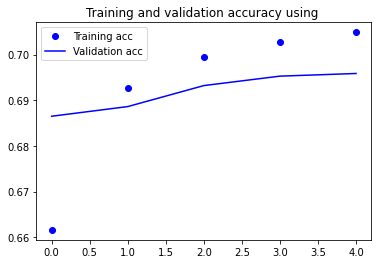

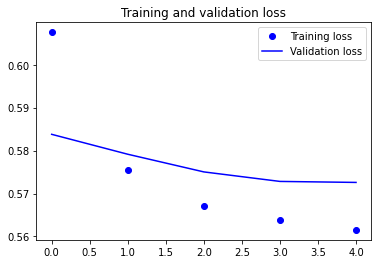

In [95]:
history = model.history


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy using ')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:

model.save('my_modelnew.h5')  

In [97]:
X_test_pad

array([[   0,    0,    0, ..., 5369,  998,   52],
       [   0,    0,    0, ...,    4,  895,   24],
       [   0,    0,    0, ...,  139,   61, 1408],
       ...,
       [   0,    0,    0, ...,  245,    6,   29],
       [   0,    0,    0, ...,  310,    8,    1],
       [   0,    0,    0, ..., 7858, 1470,  378]], dtype=int32)

In [0]:
# Performance on Test-Set
# # Now that the model has been trained we can calculate its classification accuracy on the test-set.

# %%time
# result = model.evaluate(X_test_pad, y_test_bin)

In [100]:
%%time
result = model.evaluate(X_test_pad, y_test)

6454/6454 [==============================] - 98s 15ms/step - loss: 0.5722 - acc: 0.6949
CPU times: user 1min 38s, sys: 2.97 s, total: 1min 41s
Wall time: 1min 37s


In [102]:
print("Accuracy: {0:.2%}".format(result[1]))

Accuracy: 69.49%


In [0]:
model.save('my_modelrnn.h5')